In [66]:
import requests
import csv
import json
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

DOWNLOAD_DELAY = 5

In [3]:
with open('teams.json') as data_file:
    data = json.load(data_file)

In [5]:
teams_dict = {}
dataframe_keys = ['overall_df', 'shot_5_ft_df', 'shot_8_ft_df', 'shot_area_df', 'assisted_shot_df', 'shot_type_df', 'assisted_by_df']

The way I will be storing all of the data is a dictionary within a dictionary. The outer dictionary will record which team you want to select while the inner dictionary will track which shot stat dataframe you want to select. The variable dataframe_keys shows you what are the 7 possible stat dataframes you can select.

In [6]:
for index,team_data in enumerate(data):
    time.sleep(random.uniform(0,DOWNLOAD_DELAY))

    URL = 'http://stats.nba.com/stats/teamdashboardbyshootingsplits?' + \
    'DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=00&' + \
    'Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&' + \
    'PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlusMinus=N&Rank=N&' + \
    'Season=2016-17&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&' + \
    'TeamID=' + str(team_data['teamId']) + \
    '&VsConference=&VsDivision='
    
    REQUEST_HEADERS = {
        'user-agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
        'From': 'rodellrodriguez53@gmail.com'
    }
    response = requests.get(URL, headers=REQUEST_HEADERS)
    response.raise_for_status()

    teams_dict[team_data['teamName']] = {}
    for index,(resultSets_dict,dataframe_name) in enumerate(zip(response.json()['resultSets'], dataframe_keys)):
        if dataframe_name not in teams_dict[team_data['teamName']]:
            teams_dict[team_data['teamName']][dataframe_name] =  pd.DataFrame(data=response.json()['resultSets'][index]['rowSet'], 
            columns=response.json()['resultSets'][index]['headers']) 

The outer for loop runs 30 times, each time for every team in the NBA. So for each team we have to grab that team's respective shooting splits stats. Before grabbing each team's data I instill a delay of a random wait time between 0 and 5 seconds for courtesy and to not stress the NBA's production server. If you notice the way I am concatenating the URL strings, I concatenate the TeamID based on the teams.json file. That file contains all of the TeamIDs that map to every NBA team on NBA.com's website. With that ID I can pull up any sort of stat, not just the shooting splits. That JSON file also maps each TeamID with its team name. I am using the team name specified in that file to name every record in the outer dictionary.

After grabbing the stats data, the inner for loop runs 7 times, each time updating the inner dictionary with a different shooting statline dataframe.

In [11]:
teams_dict['Golden State Warriors']['assisted_by_df']

,GROUP_SET,PLAYER_ID,PLAYER_NAME,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Assisted By,2440,"Barnes, Matt",45,45,1.0,13,13,1.0,1.144,...,14,1,1,1,1,1,1,1,168,2440
1,Assisted By,203546,"Clark, Ian",90,90,1.0,27,27,1.0,1.150,...,12,1,1,1,1,1,1,1,168,203546
2,Assisted By,201939,"Curry, Stephen",524,524,1.0,163,163,1.0,1.156,...,11,1,1,1,1,1,1,1,168,201939
3,Assisted By,201142,"Durant, Kevin",300,300,1.0,130,130,1.0,1.217,...,3,1,1,1,1,1,1,1,168,201142
4,Assisted By,203110,"Green, Draymond",533,533,1.0,182,182,1.0,1.171,...,7,1,1,1,1,1,1,1,168,203110
5,Assisted By,2738,"Iguodala, Andre",261,261,1.0,85,85,1.0,1.163,...,9,1,1,1,1,1,1,1,168,2738
6,Assisted By,2733,"Livingston, Shaun",139,139,1.0,41,41,1.0,1.147,...,13,1,1,1,1,1,1,1,168,2733
7,Assisted By,1626172,"Looney, Kevon",29,29,1.0,13,13,1.0,1.224,...,2,1,1,1,1,1,1,1,168,1626172
8,Assisted By,203949,"McAdoo, James Michael",18,18,1.0,6,6,1.0,1.167,...,8,1,1,1,1,1,1,1,168,203949
9,Assisted By,1627775,"McCaw, Patrick",77,77,1.0,30,30,1.0,1.195,...,6,1,1,1,1,1,1,1,168,1627775


See how easy it is to query the data using the nested dictionaries? I originally used lists but quickly figured out that using indicies to access any of the 210 dataframes would be a nightmare

In [18]:
teams_dict['Cleveland Cavaliers']['assisted_by_df']

,GROUP_SET,PLAYER_ID,PLAYER_NAME,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Assisted By,2365,"Andersen, Chris",5,5,1.0,4,4,1.0,1.400,...,3,1,1,1,1,1,1,1,168,2365
1,Assisted By,2399,"Dunleavy, Mike",20,20,1.0,11,11,1.0,1.275,...,6,1,1,1,1,1,1,1,168,2399
2,Assisted By,1627770,"Felder, Kay",58,58,1.0,34,34,1.0,1.293,...,4,1,1,1,1,1,1,1,168,1627770
3,Assisted By,101112,"Frye, Channing",45,45,1.0,22,22,1.0,1.244,...,11,1,1,1,1,1,1,1,168,101112
4,Assisted By,202681,"Irving, Kyrie",418,418,1.0,177,177,1.0,1.212,...,15,1,1,1,1,1,1,1,168,202681
5,Assisted By,2544,"James, LeBron",646,646,1.0,349,349,1.0,1.270,...,7,1,1,1,1,1,1,1,168,2544
6,Assisted By,2210,"Jefferson, Richard",78,78,1.0,32,32,1.0,1.205,...,17,1,1,1,1,1,1,1,168,2210
7,Assisted By,2563,"Jones, Dahntay",1,1,1.0,1,1,1.0,1.500,...,1,1,18,1,1,1,1,1,168,2563
8,Assisted By,2592,"Jones, James",14,14,1.0,7,7,1.0,1.250,...,10,1,1,1,1,1,1,1,168,2592
9,Assisted By,2594,"Korver, Kyle",35,35,1.0,17,17,1.0,1.243,...,12,1,1,1,1,1,1,1,168,2594


There are plenty of columns that we dont need, so let's trim down these two dataframes

In [44]:
gsw_assisted_by_df = teams_dict['Golden State Warriors']['assisted_by_df'][['GROUP_SET','PLAYER_NAME','FGM','FG3M']]
gsw_assisted_by_df = gsw_assisted_by_df.assign(FG2M = gsw_assisted_by_df.FGM - gsw_assisted_by_df.FG3M)
gsw_assisted_by_df = gsw_assisted_by_df.sort_values(by= 'FGM',ascending=False)

cavs_assisted_by_df = teams_dict['Cleveland Cavaliers']['assisted_by_df'][['GROUP_SET','PLAYER_NAME','FGM','FG3M']]
cavs_assisted_by_df = cavs_assisted_by_df.assign(FG2M = cavs_assisted_by_df.FGM - cavs_assisted_by_df.FG3M)
cavs_assisted_by_df = cavs_assisted_by_df.sort_values(by= 'FGM',ascending=False)

In [45]:
gsw_assisted_by_df

,GROUP_SET,PLAYER_NAME,FGM,FG3M,FG2M
4,Assisted By,"Green, Draymond",533,182,351
2,Assisted By,"Curry, Stephen",524,163,361
3,Assisted By,"Durant, Kevin",300,130,170
5,Assisted By,"Iguodala, Andre",261,85,176
12,Assisted By,"Thompson, Klay",160,45,115
15,Assisted By,"West, David",151,28,123
6,Assisted By,"Livingston, Shaun",139,41,98
11,Assisted By,"Pachulia, Zaza",132,42,90
1,Assisted By,"Clark, Ian",90,27,63
9,Assisted By,"McCaw, Patrick",77,30,47


In [46]:
cavs_assisted_by_df

,GROUP_SET,PLAYER_NAME,FGM,FG3M,FG2M
5,Assisted By,"James, LeBron",646,349,297
4,Assisted By,"Irving, Kyrie",418,177,241
11,Assisted By,"Love, Kevin",116,40,76
13,Assisted By,"Shumpert, Iman",109,47,62
17,Assisted By,"Williams, Deron",86,36,50
6,Assisted By,"Jefferson, Richard",78,32,46
16,Assisted By,"Thompson, Tristan",77,39,38
14,Assisted By,"Smith, JR",62,24,38
2,Assisted By,"Felder, Kay",58,34,24
10,Assisted By,"Liggins, DeAndre",54,26,28


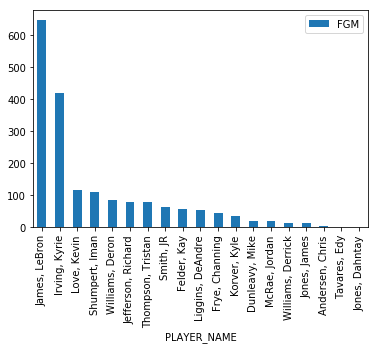

In [49]:
cavs_assisted_by_df.plot.bar(x='PLAYER_NAME',y='FGM')

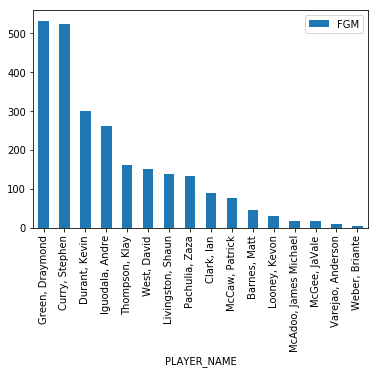

In [50]:
gsw_assisted_by_df.plot.bar(x='PLAYER_NAME',y='FGM')

In [58]:
cavs_5_ft_df = teams_dict['Cleveland Cavaliers']['shot_5_ft_df']
cavs_5_ft_df

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Shot Distance (5ft),Less Than 5 ft.,1394,2194,0.635,0,0,0.000,0.635,252,...,1,9,2,4,4,5,4,5,171,Less Than 5 ft.
1,Shot Distance (5ft),5-9 ft.,200,550,0.364,0,0,0.000,0.364,54,...,7,8,3,3,4,5,5,4,171,5-9 ft.
2,Shot Distance (5ft),10-14 ft.,196,490,0.400,0,0,0.000,0.400,16,...,6,7,5,1,4,5,7,2,171,10-14 ft.
3,Shot Distance (5ft),15-19 ft.,321,699,0.459,0,0,0.000,0.459,11,...,4,6,4,2,4,5,6,3,171,15-19 ft.
4,Shot Distance (5ft),20-24 ft.,680,1729,0.393,583,1478,0.394,0.562,8,...,3,5,1,5,2,3,2,7,171,20-24 ft.
5,Shot Distance (5ft),25-29 ft.,470,1235,0.381,470,1235,0.381,0.571,7,...,2,4,6,6,3,2,3,6,171,25-29 ft.
6,Shot Distance (5ft),30-34 ft.,11,38,0.289,11,38,0.289,0.434,0,...,5,1,6,6,1,4,1,8,171,30-34 ft.
7,Shot Distance (5ft),35-39 ft.,1,5,0.200,1,5,0.200,0.300,0,...,8,1,6,6,4,1,8,1,171,35-39 ft.
8,Shot Distance (5ft),40+ ft.,0,16,0.000,0,16,0.000,0.000,1,...,9,3,6,6,4,5,8,9,171,40+ ft.


In [60]:
gsw_5_ft_df = teams_dict['Golden State Warriors']['shot_5_ft_df']
gsw_5_ft_df

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Shot Distance (5ft),Less Than 5 ft.,1604,2440,0.657,0,0,0.000,0.657,241,...,1,9,1,5,4,5,3,6,171,Less Than 5 ft.
1,Shot Distance (5ft),5-9 ft.,186,452,0.412,0,0,0.000,0.412,31,...,7,8,5,1,4,5,6,3,171,5-9 ft.
2,Shot Distance (5ft),10-14 ft.,271,634,0.427,0,0,0.000,0.427,18,...,6,7,4,2,4,5,5,4,171,10-14 ft.
3,Shot Distance (5ft),15-19 ft.,384,834,0.460,0,0,0.000,0.460,5,...,5,4,2,4,4,5,4,5,171,15-19 ft.
4,Shot Distance (5ft),20-24 ft.,485,1150,0.422,380,932,0.408,0.587,10,...,2,6,3,3,1,4,1,8,171,20-24 ft.
5,Shot Distance (5ft),25-29 ft.,585,1547,0.378,585,1547,0.378,0.567,8,...,3,5,6,6,2,3,2,7,171,25-29 ft.
6,Shot Distance (5ft),30-34 ft.,15,43,0.349,15,43,0.349,0.523,0,...,4,1,6,6,3,2,7,2,171,30-34 ft.
7,Shot Distance (5ft),35-39 ft.,0,2,0.000,0,2,0.000,0.000,0,...,9,1,6,6,4,5,8,9,171,35-39 ft.
8,Shot Distance (5ft),40+ ft.,1,37,0.027,1,37,0.027,0.041,0,...,8,1,6,6,4,1,8,1,171,40+ ft.


In [63]:
cavs_5_ft_df = cavs_5_ft_df[['GROUP_VALUE','FGM','FGA','FG_PCT','FG3M','FG3A']]
gsw_5_ft_df = gsw_5_ft_df[['GROUP_VALUE', 'FGM','FGA','FG_PCT','FG3M','FG3A']]

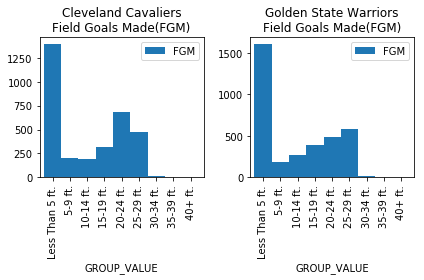

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2)

cavs_5_ft_df.plot.bar(x='GROUP_VALUE',y='FGM',width=1,ax=axes[0], title='Cleveland Cavaliers\nField Goals Made(FGM)')
gsw_5_ft_df.plot.bar(x='GROUP_VALUE',y='FGM',width=1,ax=axes[1], title='Golden State Warriors\nField Goals Made(FGM)')
plt.tight_layout()

The less than 5ft is no surprise. But the shape that appears afterwards is very interesting. For GSW the pattern is pretty scary, their FGM increases in the shape of a stair case as the distances from the hoop get greater and greater especially at 25-29 ft. Keep in mind that the NBA 3 Pt line is 23.75 feet from the basket